# Movie Recommender System

### Initialization


#### Import Libraries


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Import Dataset

In [101]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#### Information

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


#### Missing Values

In [103]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

#### Description

In [104]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [105]:
df.duplicated().sum()

0

#### Remove Low Rated Movies

In [106]:
df = df.sort_values(by='Popularity',ascending=False).head(5000)

### Exploratory Data Analysis

#### Yearwise Analysis

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_31888\4036614677.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].axhline(y = average[1], linestyle = '--',label='Average',c='black')
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_31888\4036614677.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].axhline(y = average[2], linestyle = '--',label='Average',c='black')
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_31888\4036614677.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

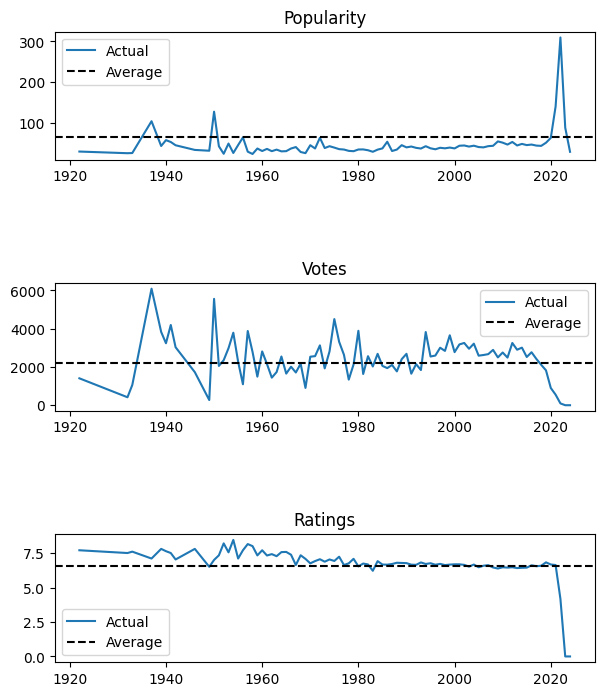

In [107]:
df['Year'] = [int(x[0:4]) for x in df['Release_Date']]
yearwise = df[['Year','Popularity','Vote_Count','Vote_Average']].groupby(['Year']).mean()
average = df[['Year','Popularity','Vote_Count','Vote_Average']].mean()

fig,ax = plt.subplots(3,1)
ax[0].plot(yearwise.index,yearwise['Popularity'],label='Actual')
ax[0].axhline(y = average[1], linestyle = '--',label='Average',c='black')
ax[0].set_title('Popularity')
ax[0].legend(loc='best')

ax[1].plot(yearwise.index,yearwise['Vote_Count'],label='Actual')
ax[1].axhline(y = average[2], linestyle = '--',label='Average',c='black')
ax[1].set_title('Votes')
ax[1].legend(loc='best')

ax[2].plot(yearwise.index,yearwise['Vote_Average'],label='Actual')
ax[2].axhline(y = average[3], linestyle = '--',label='Average',c='black')
ax[2].set_title('Ratings')
ax[2].legend(loc='best')

fig.tight_layout(pad=2.0)
fig.set_figheight(8)
plt.show()
# average

#### Genre-Wise Split

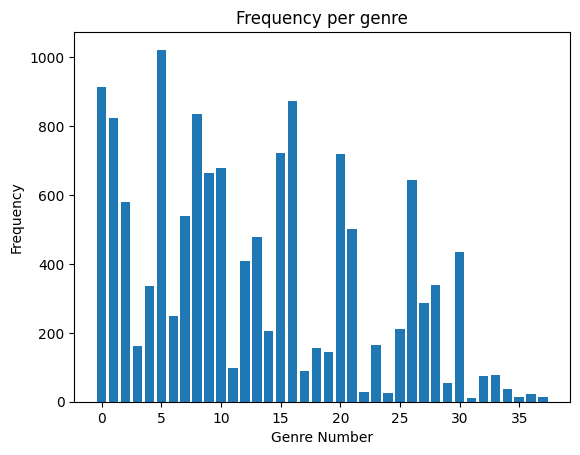

Maximum Genre and Value:  Thriller | 1022
Minimum Genre and Value: TV Movie | 12


In [108]:
genre_values = {}
value_dict = {}
def genre_fill(row):
    for genre in row.split(','):
        if genre in genre_values.keys():
            genre_values[genre]+=1
        else:
            genre_values[genre]=1

for row in df['Genre']:
    genre_fill(row)
    
plt.bar(np.arange(len(genre_values.keys())),genre_values.values())
plt.title('Frequency per genre')
plt.xlabel('Genre Number')
plt.ylabel('Frequency')
plt.show()

max_key = max(genre_values, key=genre_values.get)
min_key = min(genre_values, key=genre_values.get)
print(f"Maximum Genre and Value: {max_key} | {max(genre_values.values())}")
print(f"Minimum Genre and Value: {min_key} | {min(genre_values.values())}")

#### Heatmap

<Axes: >

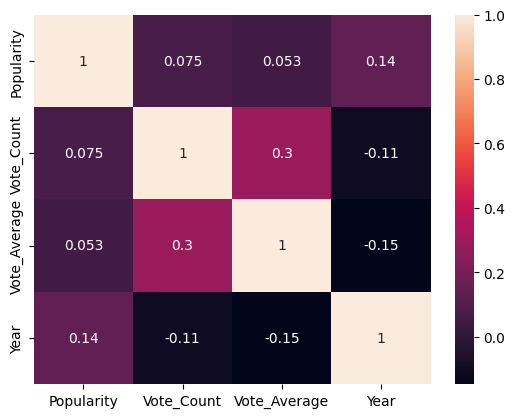

In [109]:
cols = df.describe().columns
sb.heatmap(df[cols].corr(),annot=True)

#### Pairplots

[]

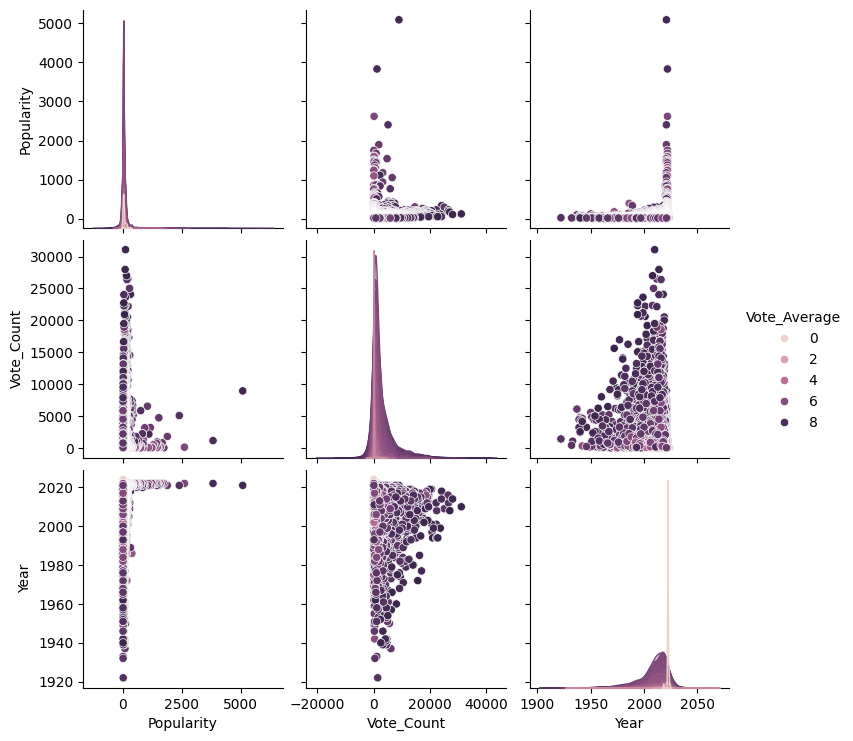

In [110]:
sb.pairplot(df,hue='Vote_Average')
plt.plot()

### Preprocessing

In [111]:
df['Overview_Stemmed'] =  df['Overview'] + " " + df['Genre'] + " " + df['Original_Language'] + df['Title'] 

#### Lowercasing

In [112]:
def stem_sentence(text):
    return text.lower()

df['Title_Lower'] = df['Title'].apply(stem_sentence)

#### Porter Stemming

In [113]:
from nltk.stem import PorterStemmer
stem = PorterStemmer()
def stem_sentence(text):
    y = []
    for word in text.split(" "):
        y.append(stem.stem(word))
    return " ".join(val for val in y)   

df['Overview_Stemmed'] = df['Overview_Stemmed'].apply(stem_sentence)

#### Vectorizing

In [114]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'),max_features=10000)
numeric_overview = vectorizer.fit_transform(df['Overview_Stemmed']).toarray()
numeric_overview

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Similarity Matrix


In [115]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(numeric_overview)
similarity_matrix[0]

array([1.        , 0.00997472, 0.01504656, ..., 0.        , 0.00908255,
       0.00318996])

### Fetching Function

In [118]:
def fetch(movie):
    try:
        index = df[df['Title_Lower']==movie.lower()].index[0]
    except:
        return "Not Available"
    movies = sorted(list(enumerate(similarity_matrix[index])),reverse=True,key=lambda x:x[1])[1:6]
    similar_movies = []
    for movie in movies:
        similar_movies.append(df.iloc[movie[0]])
    return pd.DataFrame(similar_movies).sort_values(by='Popularity',ascending=False).drop(['Title_Lower','Overview_Stemmed'],axis=1)
    
fetch('the Batman')

211     Following the death of District Attorney Harve...
559     As Gotham City's young vigilante, the Batman, ...
2162    Suspicion is on high after Batman, Batgirl, Ro...
2414    In an alternative Victorian Age Gotham City, B...
2477    Delve into the world of Batman and the vigilan...
Name: Overview, dtype: object